In [27]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [28]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [29]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [30]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [31]:
# load the dataset
folder = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/datasets/finales/"
filename = "affluent_std.csv"
dataframe = read_csv(folder + filename,parse_dates = ['hour'], index_col = ['hour'])
dataframe.rename(columns = {'energy(kWh/hh)':'energy'}, inplace = True) 
dataset = dataframe.values
dataset = dataset.astype('float32')

In [32]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [33]:
# split into train and test sets
train_size = int(32112)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [34]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [35]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [36]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=70, verbose=2)

Epoch 1/50
 - 2s - loss: 0.0060
Epoch 2/50
 - 1s - loss: 0.0015
Epoch 3/50
 - 1s - loss: 0.0011
Epoch 4/50
 - 1s - loss: 0.0011
Epoch 5/50
 - 1s - loss: 0.0011
Epoch 6/50
 - 1s - loss: 0.0011
Epoch 7/50
 - 1s - loss: 0.0011
Epoch 8/50
 - 1s - loss: 0.0011
Epoch 9/50
 - 1s - loss: 0.0011
Epoch 10/50
 - 1s - loss: 0.0011
Epoch 11/50
 - 1s - loss: 0.0011
Epoch 12/50
 - 1s - loss: 0.0011
Epoch 13/50
 - 1s - loss: 0.0011
Epoch 14/50
 - 1s - loss: 0.0011
Epoch 15/50
 - 1s - loss: 0.0011
Epoch 16/50
 - 1s - loss: 0.0011
Epoch 17/50
 - 1s - loss: 0.0011
Epoch 18/50
 - 1s - loss: 0.0011
Epoch 19/50
 - 1s - loss: 0.0011
Epoch 20/50
 - 1s - loss: 0.0011
Epoch 21/50
 - 1s - loss: 0.0011
Epoch 22/50
 - 1s - loss: 0.0011
Epoch 23/50
 - 1s - loss: 0.0011
Epoch 24/50
 - 1s - loss: 0.0011
Epoch 25/50
 - 1s - loss: 0.0011
Epoch 26/50
 - 1s - loss: 0.0011
Epoch 27/50
 - 1s - loss: 0.0011
Epoch 28/50
 - 1s - loss: 0.0011
Epoch 29/50
 - 1s - loss: 0.0011
Epoch 30/50
 - 1s - loss: 0.0011
Epoch 31/50
 - 1s -

In [37]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [38]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [39]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print('MAE', metrics.mean_absolute_error(testY[0], testPredict[:,0]))

Train Score: 0.02 RMSE
Test Score: 0.02 RMSE
MAE 0.011774193379118723


In [40]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [41]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

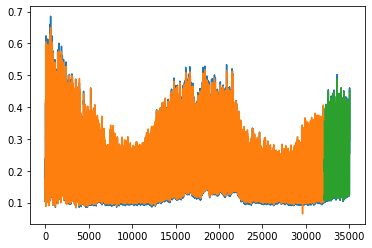

In [42]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()